In [8]:
#import bibliotek 
from sklearn.manifold import TSNE
from keras.datasets import mnist
from sklearn.datasets import load_iris
from numpy import reshape
import seaborn as sns
import pandas as pd

In [9]:
#zaladowanie danych
iris = load_iris()
X = iris.data
y = iris.target

In [10]:
#liczenie TSNE
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.000s...
[t-SNE] Computed neighbors for 150 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.509910
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.387669
[t-SNE] KL divergence after 1000 iterations: 0.129141


/opt/python/envs/default/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


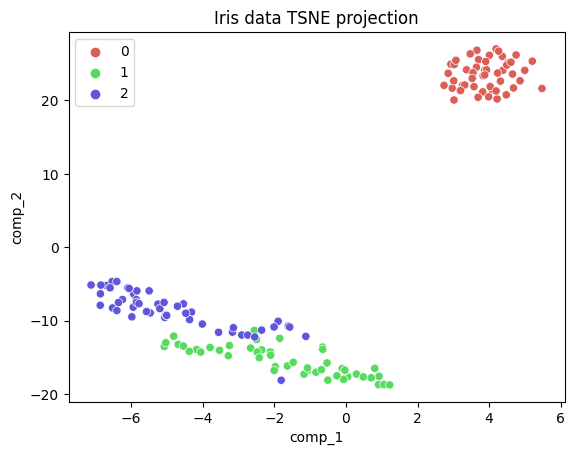

In [12]:
#wizualizacja
df = pd.DataFrame()
df['y'] = y
df['comp_1'] = z[:, 0]
df['comp_2'] = z[:, 1]

sns.scatterplot(x='comp_1', y='comp_2', hue=df.y.tolist(), 
                palette=sns.color_palette('hls', 3),
                data=df).set(title='Iris data TSNE projection')

In [13]:
#na innej bazie danych MNIST
(X_train, y_train), (_, _) = mnist.load_data()
X_train = X_train[:3000]
y_train = y_train[:3000]
print(X_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
(3000, 28, 28)


In [14]:
#zmiana z trzech do dwoch przestrzeni 
X_mnist = reshape(X_train, [X_train.shape[0], X_train.shape[1]*X_train.shape[2]])
print(X_mnist.shape)

(3000, 784)


In [15]:
#liczenie TSNE
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(X_mnist)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.002s...
[t-SNE] Computed neighbors for 3000 samples in 0.524s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 607.882413
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.365952
[t-SNE] KL divergence after 1000 iterations: 1.271625


/opt/python/envs/default/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


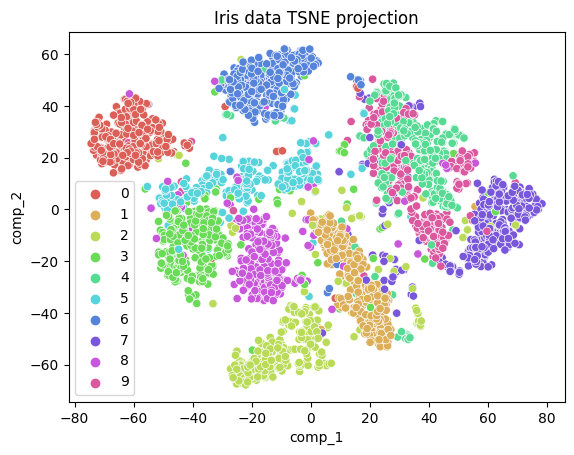

In [17]:
#wizualizcja
df = pd.DataFrame()
df['y'] = y_train
df['comp_1'] = z[:, 0]
df['comp_2'] = z[:, 1]

sns.scatterplot(x='comp_1', y='comp_2', hue=df.y.tolist(), 
                palette=sns.color_palette('hls', 10),
                data=df).set(title='Iris data TSNE projection')